## Lab 2: Principal Component Analysis
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

# Exercise 1
Use the  ```Dry_Bean_Dataset.xlsx``` available on the  ```github``` page of the labs.
- Divide your dataset into a train and a test set.
- Preprocess the data by centering the variables and dividing them by their standard deviation.

In [2]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
y = df['Class']
X = df.drop('Class', axis=1)

In [5]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [7]:
X_mean = Xtrain.mean()
X_std = Xtrain.std()

In [8]:
Xtrain = (Xtrain-X_mean )/X_std

In [9]:
Xtrain.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9945,-0.020579,0.081456,0.157019,-0.027894,0.313246,0.514782,-0.021343,0.091084,-1.385339,-0.020203,-0.129736,-0.409317,-0.183725,-0.510026,-0.440103,0.275028
2864,0.663304,0.888264,0.604857,1.030676,-0.356161,-0.080730,0.662962,0.858751,0.750145,-0.189601,-0.668547,0.282420,-1.275968,-0.515879,0.246329,0.870569
13292,-0.480262,-0.560702,-0.490749,-0.510067,-0.131452,0.145397,-0.481816,-0.512594,-1.143735,0.275674,0.553784,0.016155,0.510490,0.161148,-0.022239,-0.103853
8755,-0.286874,-0.271905,-0.275273,-0.215947,-0.175398,0.103551,-0.283971,-0.247508,-0.089475,-0.455531,0.167279,0.066833,0.069602,-0.007013,0.028458,0.075814
11358,-0.777437,-1.006177,-0.962814,-0.889716,-0.483776,-0.223922,-0.779581,-0.961383,0.349010,0.626836,0.929310,0.416263,1.158259,0.904753,0.383385,0.606115


- Write your own algorithm to perform PCA on the variables.

In [10]:
#Since the intent of these laboratories is for YOU to learn and test the algorithms, we will not provide a "hand-made" version of the algorithm in these solutions (as your code will be commented during the exam).
#We will use instead the sklearn version of PCA. You can check if your results match the provided solution.

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA() #this will keep all the components
#alternatively you can specify the number of components you want to keep by writing 
# pca = PCA(n_components =3)

In [13]:
pca.fit(Xtrain) #this is just a fit of the model to the training set

PCA()

- Using the training set, obtain and plot the eigenvalue spectrum using the log-scale for the y-axis. What number of principal components would you select?

Text(0.5, 1.0, 'Eigenvalues spectrum')

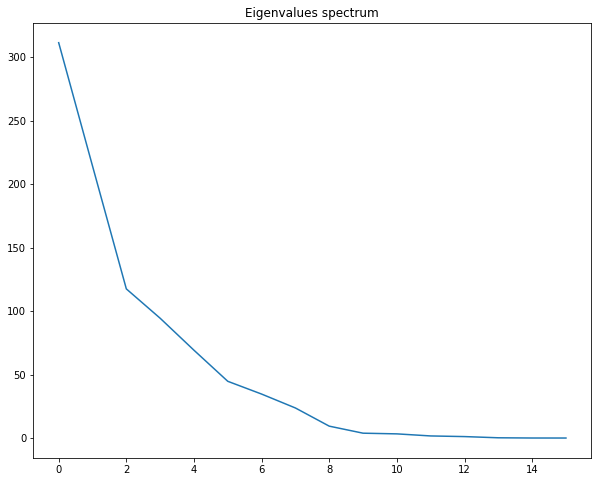

In [14]:
plt.figure(figsize=(10,8))
plt.plot(pca.singular_values_)
plt.title("Eigenvalues spectrum")

Text(0.5, 1.0, 'Log-scale for eigenvalues')

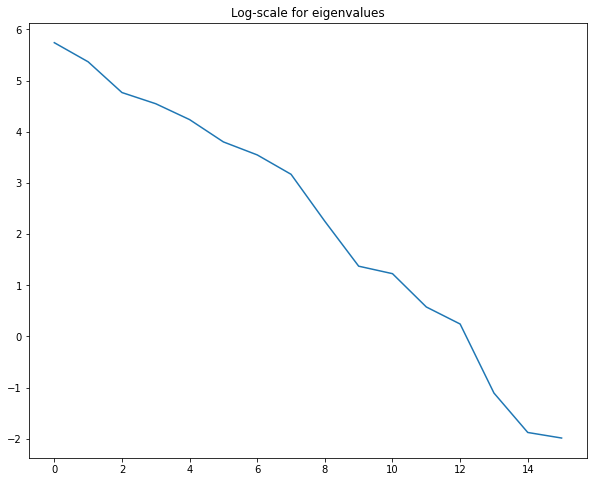

In [15]:
plt.figure(figsize=(10,8))
plt.plot(np.log(pca.singular_values_))
plt.title("Log-scale for eigenvalues")

Text(0.5, 1.0, 'Amount of variance explained by each PC')

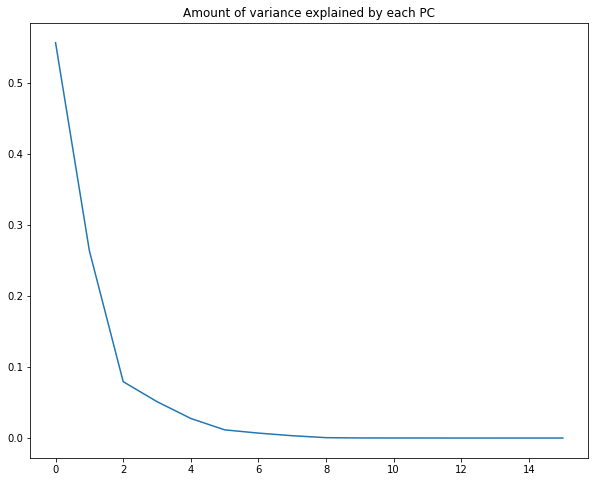

In [16]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_)
plt.title("Amount of variance explained by each PC")

- Project the data (training set) in the first two principal components and color by class. Do it also for three principal components. 

In [17]:
X_new = pca.transform(Xtrain)
print(X_new.shape)

#you can also fit the model and apply the dimensionality reduction to the same set by writing
#pca.fit_transform(Xtrain)

(10888, 16)


In [18]:
X_new_3 = X_new[:,:3]

In [19]:
ytrain = np.array(ytrain)

In [20]:
data = np.column_stack((X_new_3, ytrain))
print(data.shape)

(10888, 4)


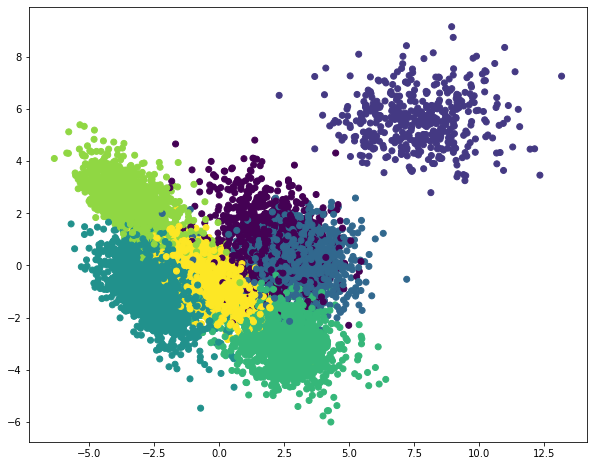

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=data[:,3])

Text(0.5, 0, '3rd PC')

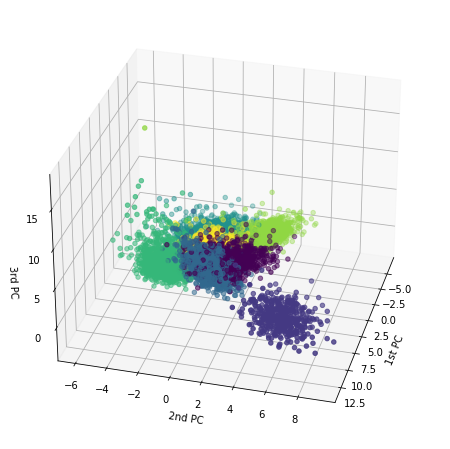

In [22]:
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,3])
axes.view_init(30,15)
axes.set_xlabel('1st PC')
axes.set_ylabel('2nd PC')
axes.set_zlabel('3rd PC')

- For an increasing number of principal components (1 to 16):
- - Apply a multinomial logistic regression to learn a model on the training set (use  ```sklearn.linear_model.LogisticRegression``` ).
- - Transform the test set with the matrix learned from the traning set. Make a prediction with the logistic model learned. 
- - Assess the quality of the predictions and comment on the results. 

In [23]:
Xtrain = (Xtrain- Xtrain.mean())/Xtrain.std()

In [24]:
score = []
for i in range(X_new.shape[1]):
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_new[:,:i+1], ytrain.ravel())

    x_PC = pca.transform(Xtrain)
    x_PC = x_PC[:,:i+1] #keep only
    
    yhat = lr.predict(x_PC)
    print(lr.score(x_PC, ytrain.ravel()))
    score.append(lr.score(x_PC, ytrain.ravel()))

0.6291329904481998
0.8732549595885378
0.8822556943423953
0.8928177810433505
0.9254224834680382
0.9261572373254959
0.9262490815576782
0.9264327700220426
0.9268001469507715
0.9268001469507715
0.9268001469507715
0.9268001469507715
0.9268001469507715
0.9268001469507715
0.9268001469507715
0.9268001469507715


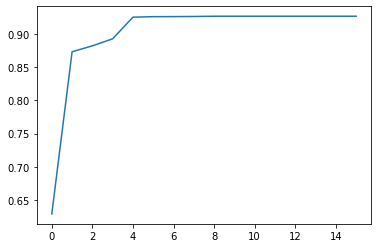

In [25]:
plt.plot(score)
plt.show()

In [26]:
print(f"The maximum values of the accuracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

The maximum values of the accuracy score is reached with 8 PCs and it is equal to 0.9268001469507715


# Exercise 2
Try to apply PCA to the Swiss Roll dataset ($n=1000$) and plot the projection on the first two principal components. Choose an appropriate color scheme for visualization and comment on your results. 

In [33]:
def swiss_roll(n): #from lab 1
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
               
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

In [34]:
X = swiss_roll(1000)

In [35]:
X = (X-np.mean(X)) #or (X-np.mean(X))/np.std(X) but it is only necessary to centralize the data in practice

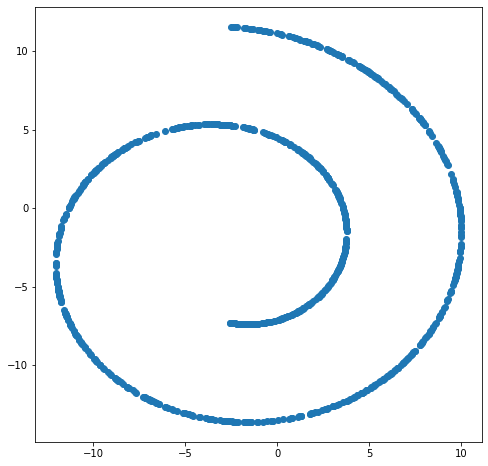

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

In [37]:
pca_swiss = PCA(n_components=2)
X_transformed = pca_swiss.fit_transform(X)

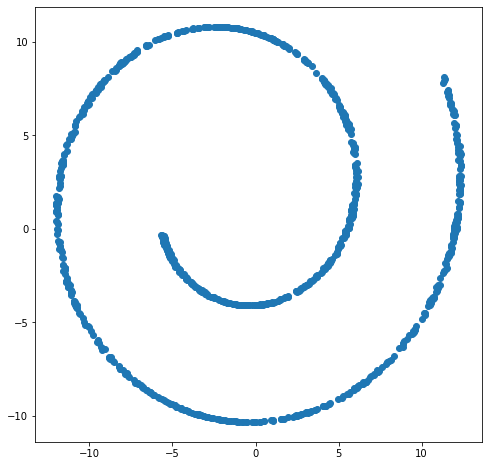

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(X_transformed[:,0], X_transformed[:,1])